In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
sx, sy = sym.symbols('sx, sy')

sZ = 3 * ((1-sx)**2) * sym.exp(- (sx**2) - (sy+1)**2) \
        - 10 * ( (sx/5) - (sx**3) - (sy**5)) * sym.exp(-(sx**2) - (sy**2)) \
        - (1/3) * sym.exp( -((sx+1)**2) - (sy**2) )

Z = sym.lambdify((sx, sy), sZ, 'numpy')

In [3]:
def peaks(x, y, f):
    
    x,y = np.meshgrid(x, y)

    z = f(x, y)
    
    return z

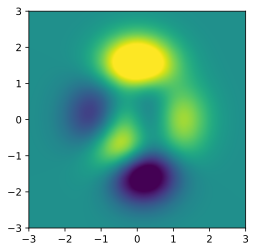

In [4]:
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)

Z = peaks(x, y, Z)

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.show()


In [23]:
df_x = sym.lambdify((sx, sy), sym.diff(sZ,sx), 'numpy')
df_y = sym.lambdify((sx, sy), sym.diff(sZ,sy), 'numpy')

df_x(-1, -1), df_y(-1, -1)

(3.331871028164406, 1.649441004531616)

In [40]:
localMin = np.random.rand(2)*4 - 2
startPnt = localMin[:]

learning_rate = 0.01
training_epochs = 1000

trajectory = np.zeros((training_epochs, 2))

for i in range(training_epochs):
    grad = np.array(
        [
            df_x(localMin[0], localMin[1]),
            df_y(localMin[0], localMin[1])
        ]
    )

    localMin = localMin - learning_rate*grad
    trajectory[i, :] = localMin

print(localMin)
print(startPnt)

[-1.34732731  0.20470745]
[-1.35159467  1.83191202]


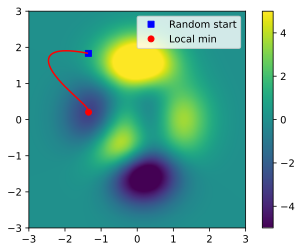

In [41]:
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startPnt[0], startPnt[1], 'bs')
plt.plot(localMin[0], localMin[1], 'ro')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
plt.legend(['Random start', 'Local min'])
plt.colorbar()
plt.show()

## Additional explanation

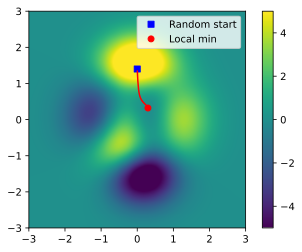

In [53]:
localMin = np.array([0, 1.4])
startPnt = localMin[:]

learning_rate = 0.01
training_epochs = 1000

trajectory = np.zeros((training_epochs, 2))

for i in range(training_epochs):
    grad = np.array(
        [
            df_x(localMin[0], localMin[1]),
            df_y(localMin[0], localMin[1])
        ]
    )

    localMin = localMin - learning_rate*grad
    trajectory[i, :] = localMin

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startPnt[0], startPnt[1], 'bs')
plt.plot(localMin[0], localMin[1], 'ro')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
plt.legend(['Random start', 'Local min'])
plt.colorbar()
plt.show()